Test of STARS module, noise now put in function. Helper functions to get $\mu_*$ and $h$ added.

In [1]:
import numpy as np
import dfo

In [2]:
def tfun(x,var=1E-4):
    return np.dot(x[0:2],x[0:2])+1E-2*np.random.randn(1)

dim=10
xinit=200*np.random.rand(dim)-100
#my nasty initial condition, but all others will plateau
xinit[0]=100
xinit[1]=.1
##setup
print(tfun(xinit))

[10000.00057302]


In [3]:
mu_star=dfo.get_mu_star(1E-4,2,10)
h=dfo.get_h(2,10)

x=np.copy(xinit)
maxit=75
xhist=np.copy(x)
fhist=tfun(x)
for i in range(maxit):
    [x,f,temp,temp2]=dfo.STARS(x,tfun,mu_star,h)
    xhist=np.vstack((xhist,x))
    fhist=np.hstack((fhist,f))
    
x2=np.copy(xinit)
x2hist=np.copy(x2)
f2hist=tfun(x2)
mu_star=dfo.get_mu_star(1E-4,2,1)
h=dfo.get_h(2,1)
u=np.zeros(dim)
u[0:2]=1
u*=1/np.sqrt(2)
for i in range(maxit):
    [x2,f,temp,temp2]=dfo.STARS_RV(x2,tfun,u,mu_star,h)
    x2hist=np.vstack((x2hist,x2))
    f2hist=np.hstack((f2hist,f))

In [4]:
mu_star=dfo.get_mu_star(1E-4,2,2)
h=dfo.get_h(2,2)
x3=np.copy(xinit)
maxit=75
xhist3=np.copy(x3)
fhist3=tfun(x3)
active=np.eye(dim)
active=active[0:2,:]
print(active)
for i in range(maxit):
    [x3,f,temp,temp2]=dfo.STARS(x3,tfun,mu_star,h,active=active)
    xhist3=np.vstack((xhist3,x3))
    fhist3=np.hstack((fhist3,f))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0.28164921 0.84631355 0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0.81519935 0.27235738 0.         0.         0.         0.
 0.         0.         0.         0.        ]
[ 0.07916142 -0.64064363  0.          0.          0.          0.
  0.          0.          0.          0.        ]
[-0.91873528 -1.01563547  0.          0.          0.          0.
  0.          0.          0.          0.        ]
[-0.43592416  0.83264263  0.          0.          0.          0.
  0.          0.          0.          0.        ]
[0.12775144 0.61151668 0.         0.         0.         0.
 0.         0.         0.         0.        ]
[ 1.1855893  -0.56380652  0.          0.          0.          0.
  0.          0.          0.          0.        ]
[0.14013879 0.09209128 0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0.02540803 0.4293774  0.         0.         0.      

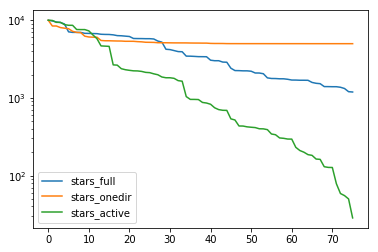

[10000.01371877  8434.165748    8430.17265934  8043.72051179
  7904.4343769   7775.65515494  7200.40791194  6972.53205095
  6930.26062673  6230.25661514  6086.30348469  6049.87002786
  6047.4958436   5487.94549884  5441.88845097  5438.91333237
  5418.05734576  5402.5125608   5396.78322121  5357.30120976
  5357.26318537  5352.82115635  5301.78924463  5270.51877739
  5205.44465866  5195.78975639  5183.45921684  5131.78778805
  5128.84307618  5128.19613438  5117.48200936  5109.1566311
  5107.51426588  5105.45844148  5104.14565075  5090.57511962
  5084.04757251  5081.91912622  5073.6362302   5073.5954806
  5031.38906516  5020.11103484  5019.85225483  5016.71186078
  5000.41402175  4997.31798757  4997.04801423  4995.1351745
  4995.03630858  4994.9677935   4994.93323171  4994.90415083
  4994.87363542  4994.38493234  4993.68348263  4993.62455363
  4993.54777319  4992.7223535   4992.55223462  4992.47830975
  4992.4111758   4992.1877734   4992.20021279  4991.91876875
  4990.97545747  4990.97529

In [5]:
import matplotlib.pyplot as plt
plt.semilogy(fhist,label='stars_full')
plt.semilogy(f2hist,label='stars_onedir')
plt.semilogy(fhist3,label='stars_active')
plt.legend()
plt.show()
print(f2hist)

[100.           0.1        -37.82848192  42.66999523 -82.00095452
 -58.39855317  45.96776124  50.99999423 -43.66089993  40.68689987]
[ 91.44791988  -8.45208012 -37.82848192  42.66999523 -82.00095452
 -58.39855317  45.96776124  50.99999423 -43.66089993  40.68689987]
[ 50.35078952 -49.54921048 -37.82848192  42.66999523 -82.00095452
 -58.39855317  45.96776124  50.99999423 -43.66089993  40.68689987]


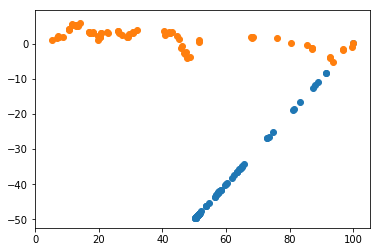

In [8]:
#plt.scatter(xhist[0],xhist[1])
plt.scatter(x2hist[:,0],x2hist[:,1])
plt.scatter(xhist3[:,0],xhist3[:,1])

print(x2hist[0])
print(x2hist[1])
print(x2hist[-1])

plt.show()


